In [ ]:
#Agroecology adoption rate forcasting

In [1]:
#Loading the require packages
import pandas as pd
import numpy as np

In [5]:
#Importation of the dataset
dataframe = pd.read_excel('/content/datas.xls')


In [6]:
#First five records
dataframe.head()

,Province,Annee,Taux_agro
0,KOSSI,2010,0.090177
1,MOUHOUN,2010,0.060981
2,SOUROU,2010,0.227739
3,BALE,2010,0.047508
4,BANWA,2010,0.023894


In [7]:

#Descriptive Statistics
series = pd.read_excel('/content/datas.xls', header=0, index_col=0)
series.describe()

,Annee,Taux_agro
count,506.000000,506.000000
mean,2015.000000,0.126206
std,3.165407,0.126020
min,2010.000000,0.000000
25%,2012.000000,0.032064
50%,2015.000000,0.092669
75%,2018.000000,0.182432
max,2020.000000,0.679179


In [ ]:
#PERSISTENCE MODEL

In [ ]:
df = pd.read_excel('/content/datas.xls')


In [ ]:
df['t'] =  df['Taux_agro'].shift(1)

In [ ]:
train, test = df[1:df.shape[0]-46], df[df.shape[0]-46:]

In [ ]:
train_X, train_y = train['t'], train['Taux_agro']
test_X, test_y = test['t'], test['Taux_agro']

In [ ]:
predictions = test_X.copy()

In [ ]:
print(predictions)
print(test_y)

414    0.123200
415    0.069662
416    0.000000
417    0.159853
418    0.005431
419    0.000000
420    0.053415
421    0.000000
422    0.000000
423    0.032522
424    0.032532
425    0.100761
426    0.007119
427    0.178268
428    0.135831
429    0.121654
430    0.124434
431    0.055050
432    0.000000
433    0.006936
434    0.000000
435    0.009357
436    0.000000
437    0.155662
438    0.065404
439    0.056382
440    0.034048
441    0.000000
442    0.000000
443    0.003238
444    0.016715
445    0.131528
446    0.222371
447    0.043208
448    0.112762
449    0.188142
450    0.140765
451    0.212457
452    0.648397
453    0.554862
454    0.234048
455    0.083031
456    0.055837
457    0.038086
458    0.021304
459    0.022317
Name: t, dtype: float64
414    0.069662
415    0.000000
416    0.159853
417    0.005431
418    0.000000
419    0.053415
420    0.000000
421    0.000000
422    0.032522
423    0.032532
424    0.100761
425    0.007119
426    0.178268
427    0.135831
428    0.121654


In [ ]:

# Calculation of the mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

0.012043108435168056

In [ ]:
# Calculation of the R²
from sklearn.metrics import r2_score
r2 = r2_score(test_y, predictions)
print(f"Coefficient de détermination (R²) : {r2}")

Coefficient de détermination (R²) : 0.2710285764248993


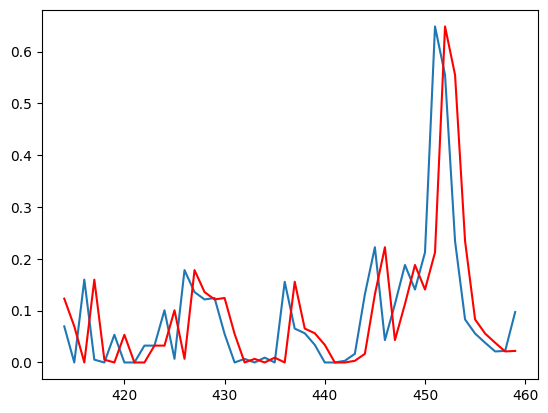

In [ ]:
#Ploting prediction vs real values
from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

Predictions of futures values: 461    0.239236
462    0.009504
463    0.020403
464    0.058192
465    0.030210
466    0.011017
467    0.087787
468    0.044786
469    0.119680
470   -0.030111
471    0.092565
472    0.247509
473    0.262225
474    0.116379
475    0.142028
476    0.102075
477    0.005434
478    0.038186
479    0.036500
480   -0.029827
481    0.044666
482    0.080208
483    0.107682
484    0.161120
485    0.047255
486    0.011736
487   -0.003359
488   -0.001169
489    0.156939
490    0.279388
491    0.074523
492    0.074722
493    0.057642
494    0.097311
495    0.181833
496    0.521488
497    0.401594
498    0.212209
499    0.059001
500    0.059632
501    0.065343
502    0.056093
503    0.110473
504    0.152461
505    0.089835
506         NaN
dtype: float64


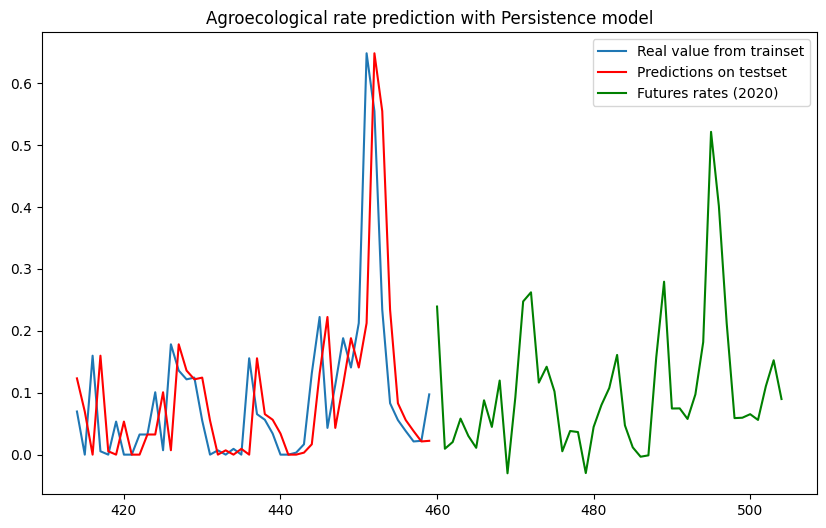

In [ ]:
# Forecasting the next 46 observations i.e next year value
model_fit = model.fit()
future_predictions = model_fit.predict(start=460, end=460+45, dynamic=False)
print(f'Predictions of futures values: {future_predictions}')

# Ploting predictions VS reals values VS forecasted vales
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
pyplot.plot(test_y, label='Real value from trainset')
pyplot.plot(predictions, color='red', label='Predictions on testset')
plt.plot(range(460, 460+46), future_predictions, color='green', label='Futures rates (2020)')
#plt.axvline(x=368, color='gray', linestyle='--', label='Début des prédictions')
plt.legend()
plt.title('Agroecological rate prediction with Persistence model')
plt.show()

In [ ]:
#Autoregression Model

In [ ]:
df = pd.read_excel('/content/datas.xls')

In [ ]:
train, test = df.Taux_agro[1:df.shape[0]-46], df.Taux_agro[df.shape[0]-46:]

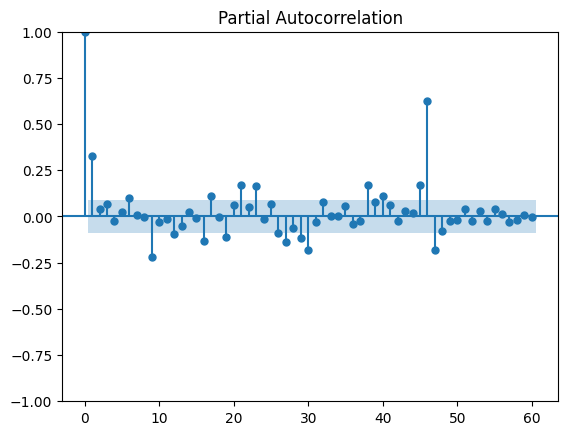

In [ ]:
# Ploting the PACF for AR
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Taux_agro, lags=60)
plt.show()

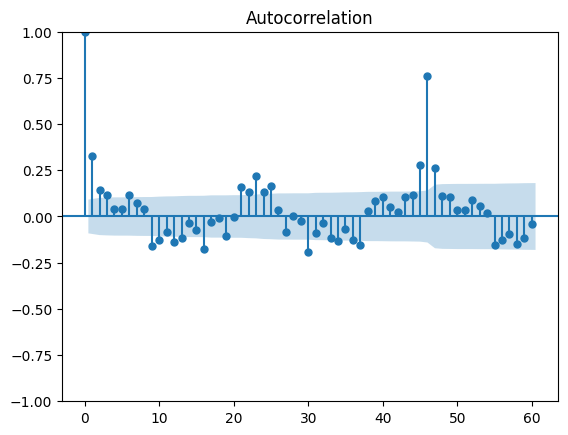

In [ ]:
# Ploting the ACF for MA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.Taux_agro, lags=60)
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model = AutoReg(train,lags=46) #
model_fit = model.fit()

In [ ]:
model_fit.params

,0
const,0.020234
Taux_agro.L1,-0.003717
Taux_agro.L2,-0.017232
Taux_agro.L3,-0.060170
Taux_agro.L4,-0.005074
Taux_agro.L5,-0.068443
Taux_agro.L6,0.071289
Taux_agro.L7,0.029081
Taux_agro.L8,0.058730
Taux_agro.L9,0.005202


In [ ]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test))

In [ ]:
prediction=predictions[0:46]
#prediction

In [ ]:
#Calculation of mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, prediction)
mse

0.014183954553211097

In [ ]:

# Calculer of R²
from sklearn.metrics import r2_score
r2 = r2_score(test_y, prediction)
print(f"Coefficient de détermination (R²) : {r2}")

Coefficient de détermination (R²) : 0.14144279292669693


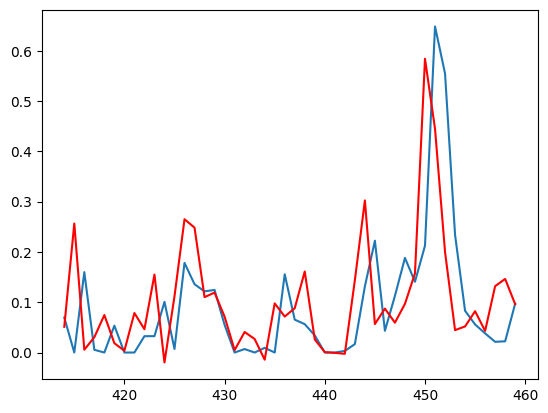

In [ ]:
from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(prediction, color='red')

In [ ]:
df.tail()

,Province,Taux_agro
Date,,
2019,BOUGOURIBA,0.055837
2019,PONI,0.038086
2019,IOBA,0.021304
2019,NOUMBIEL,0.022317
2019,National,0.097323


futures values: 461    0.239236
462    0.009504
463    0.020403
464    0.058192
465    0.030210
466    0.011017
467    0.087787
468    0.044786
469    0.119680
470   -0.030111
471    0.092565
472    0.247509
473    0.262225
474    0.116379
475    0.142028
476    0.102075
477    0.005434
478    0.038186
479    0.036500
480   -0.029827
481    0.044666
482    0.080208
483    0.107682
484    0.161120
485    0.047255
486    0.011736
487   -0.003359
488   -0.001169
489    0.156939
490    0.279388
491    0.074523
492    0.074722
493    0.057642
494    0.097311
495    0.181833
496    0.521488
497    0.401594
498    0.212209
499    0.059001
500    0.059632
501    0.065343
502    0.056093
503    0.110473
504    0.152461
505    0.089835
506         NaN
dtype: float64


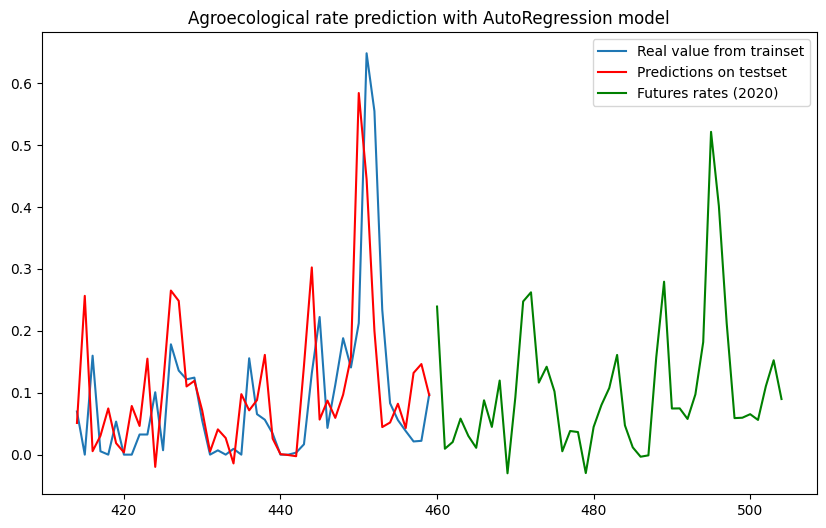

In [ ]:
# Forecasting the next year values
future_predictions = model_fit.predict(start=460, end=460+45, dynamic=False)
print(f'futures values: {future_predictions}')

# Visualization of the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
pyplot.plot(test_y, label='Real value from trainset')
pyplot.plot(predictions, color='red', label='Predictions on testset')
plt.plot(range(460, 460+46), future_predictions, color='green', label='Futures rates (2020)')
#plt.axvline(x=368, color='gray', linestyle='--', label='Début des prédictions')
plt.legend()
plt.title('Agroecological rate prediction with AutoRegression model')
plt.show()

In [ ]:
#MOVING AVERAGE MODEL

In [ ]:
df = pd.read_excel('/content/datas.xls', header=0)

In [ ]:
df['t'] =  df['Taux_agro'].shift(1)
df['Resid'] = df['Taux_agro'] - df['t']

In [ ]:
train, test = df.Resid[1:df.shape[0]-46], df.Resid[df.shape[0]-46:]

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model = AutoReg(train, lags=46)
model_fit = model.fit()

In [ ]:
pred_resid1 = model_fit.predict(start=len(train), end=len(train)+len(test))

In [ ]:
pred_resid=pred_resid1[0:46]

In [ ]:
predictions = df.t[df.shape[0]-46:] + pred_resid

In [ ]:
#pred_resid1

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

0.028529684813082407

In [ ]:
# Calculation of R²
from sklearn.metrics import r2_score
r2 = r2_score(test_y, predictions)
print(f"Coefficient de détermination (R²) : {r2}")

Coefficient de détermination (R²) : -0.726906725477092


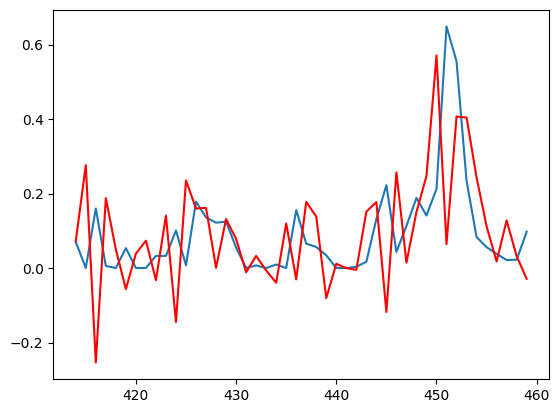

In [ ]:
from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

Prédictions futures pour les 46 prochaines observations: 461    0.167573
462   -0.233885
463    0.018283
464    0.036512
465   -0.027319
466   -0.019114
467    0.075359
468   -0.044769
469    0.076010
470   -0.154539
471    0.127878
472    0.153665
473    0.012887
474   -0.143948
475    0.028823
476   -0.038388
477   -0.097932
478    0.030615
479   -0.000748
480   -0.064268
481    0.072452
482    0.031049
483    0.032161
484    0.052335
485   -0.116831
486   -0.032246
487   -0.012988
488   -0.001763
489    0.160899
490    0.122908
491   -0.209241
492    0.004766
493   -0.017939
494    0.039765
495    0.081711
496    0.342584
497   -0.132559
498   -0.183715
499   -0.147409
500    0.004424
501    0.002777
502   -0.006779
503    0.052996
504    0.037024
505   -0.064187
506         NaN
dtype: float64


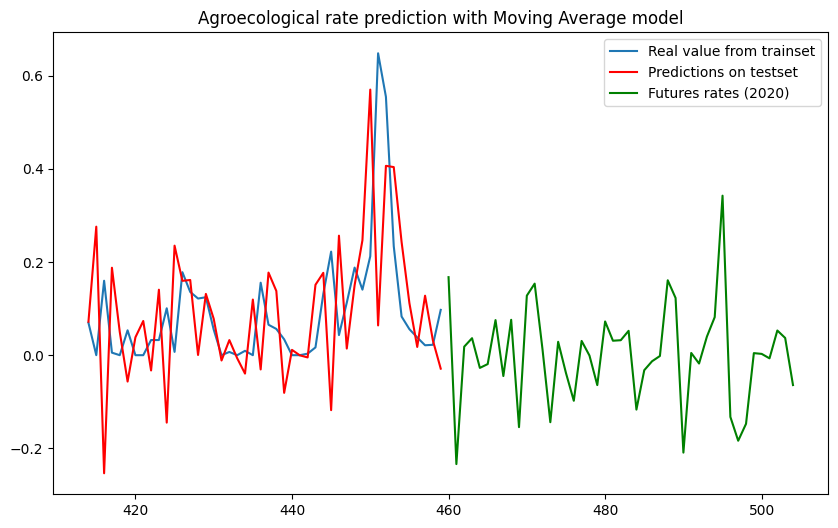

In [ ]:
# Forecasting the next 46 observations for next year
future_predictions = model_fit.predict(start=460, end=460+45, dynamic=False)
print(f' futures values: {future_predictions}')
# Visualization of the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
pyplot.plot(test_y, label='Real value from trainset')
pyplot.plot(predictions, color='red', label='Predictions on testset')
plt.plot(range(460, 460+46), future_predictions, color='green', label='Futures rates (2020)')
#plt.axvline(x=368, color='gray', linestyle='--', label='Début des prédictions')
plt.legend()
plt.title('Agroecological rate prediction with Moving Average model')
plt.show()

In [ ]:
#Stationarity test to determine the order of integration between AR and MA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
x=df["Taux_agro"].values
result=adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: %.3f' %(key,value))
if result[0]<result[4]["5%"]:
    print("Reject Ho-The time series is then stationary")
else:
    print("Fail to reject Ho-The time series is not stationary")

ADF Statistic: -5.957114
p-value: 0.000000
Critical values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
Reject Ho-The time series is then stationary


In [ ]:
df.head()

,Date,Province,Taux_agro,t,Resid
0,2010,KOSSI,0.060177,NaN,NaN
1,2010,MOUHOUN,0.060981,0.060177,0.000805
2,2010,SOUROU,0.227739,0.060981,0.166758
3,2010,BALE,0.047508,0.227739,-0.180231
4,2010,BANWA,0.023894,0.047508,-0.023614


In [ ]:
df.head()

,Taux_agro,t,Resid
1,0.060981,0.060177,0.000805
2,0.227739,0.060981,0.166758
3,0.047508,0.227739,-0.180231
4,0.023894,0.047508,-0.023614
5,0.285647,0.023894,0.261753


In [ ]:
df = pd.read_excel('/content/datas.xls') #header=0 index_col=0
train, test = df[1:df.shape[0]-46], df[df.shape[0]-46:]
train_y = train['Taux_agro']
test_y = test['Taux_agro']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(y_train, order=(1,0,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  413
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 280.463
Date:                Wed, 19 Feb 2025   AIC                           -552.927
Time:                        16:05:46   BIC                           -536.833
Sample:                             0   HQIC                          -546.561
                                - 413                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1322      0.013     10.422      0.000       0.107       0.157
ar.L1          0.4961      0.176      2.824      0.005       0.152       0.840
ma.L1         -0.2338      0.185     -1.267      0.2

In [ ]:
prediction=model_fit.forecast(46)
#prediction

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, prediction)
mse

0.018124415244741173

In [ ]:
from sklearn.metrics import r2_score

# Calculer le R²
r2 = r2_score(test_y, prediction)
print(f"Coefficient de détermination (R²) : {r2}")

Coefficient de détermination (R²) : -0.09707397002614959


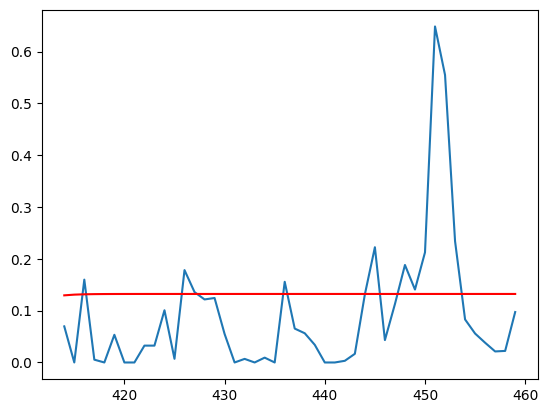

In [ ]:
from matplotlib import pyplot
pyplot.plot(test_y)

pyplot.plot(range(414, 460),prediction, color='red')

Prédictions futures pour les 46 prochaines observations: [0.13223534 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534
 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534
 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534
 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534
 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534
 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534
 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534 0.13223534
 0.13223534 0.13223534 0.13223534 0.13223534]


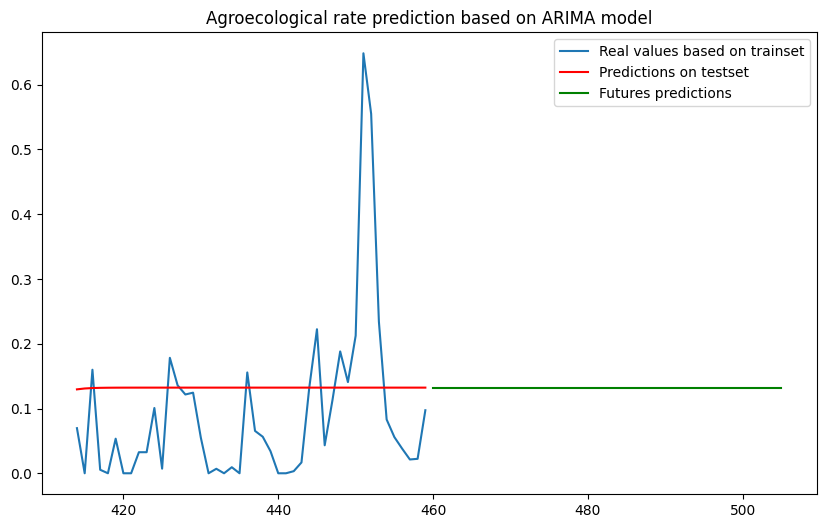

In [ ]:
# Forecasting next year values (2021)
future_predictions = model_fit.forecast(steps=92)[46:]
print(f' futures values: {future_predictions}')

# Visualization of the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
pyplot.plot(test_y, label='Real values based on trainset')
pyplot.plot(range(414, 460), prediction, color='red', label='Predictions on testset')
plt.plot(range(460, 460+46), future_predictions, color='green', label='Futures predictions')
#plt.axvline(x=368, color='gray', linestyle='--', label='Début des prédictions')
plt.legend()
plt.title('Agroecological rate prediction based on ARIMA model')
plt.show()